# Import các libraries cần thiết và load data

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
random.seed(0) # please do not remove this line

iris = np.genfromtxt('iris_full.csv', 
                     dtype=None, 
                     delimiter=',', 
                     skip_header=1) 
X_data = iris[:, :4]
y_data = iris[:, 4]

In [70]:
intercept = np.ones((X_data.shape[0], 1))
X_data = np.concatenate((intercept, X_data), axis=1)

print(X_data.shape)
print(y_data)

(100, 5)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


# Huấn luyện và nhận định

In [71]:
n = 5                  # size of individual (chromosome)
m = 500                # size of population
n_generations = 1000   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu

def sigmoid_function(z):
    # compute sigmoid (your code here)

    return 

def predict(X, theta):    
    # compute output (your code here)

    return y_hat

def loss_function(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()
    
def generate_random_value(bound = 20):
    return (random.random()-0.5)*bound

def compute_loss(individual):
    # compute ouput (your code here)
    
    # compute loss (your code here)
    
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s

In [ ]:
##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    if i%100 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        print("Best loss:", compute_loss(sorted_population[m-1]), sorted_population[m-1]) 
      
    # create new_population
    new_population = sorted_population[-elitism:] 
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
            
    # update population
    population = new_population

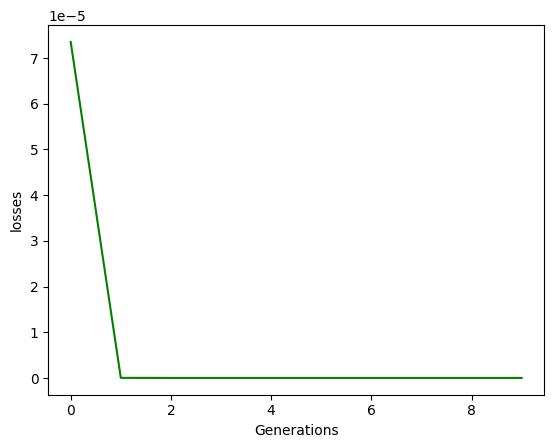

In [73]:
import matplotlib.pyplot as plt

plt.plot(losses, c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

In [75]:
print(preds)
print(y_data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
